# The Family-Wise Error Rate

Recall from (13.5) that if the null hypothesis is true for each of $m$ independent hypothesis tests, then the FWER is equal to $1 -(1 - \alpha)^m$. We can use this expression to compute the FWER for $m = 1, \ldots, 500$ and $\alpha = 0.05$, $0.01$, and $0.001$.

In [1]:
m <- 1:500
fwe1 <- 1 - (1 - 0.05)^m
fwe2 <- 1 - (1 - 0.01)^m
fwe3 <- 1 - (1 - 0.001)^m

We plot these three vectors in order to reproduce Figure 13.2. The red, blue, and green lines correspond to $\alpha = 0.05$, $0.01$, and $0.001$, respectively.

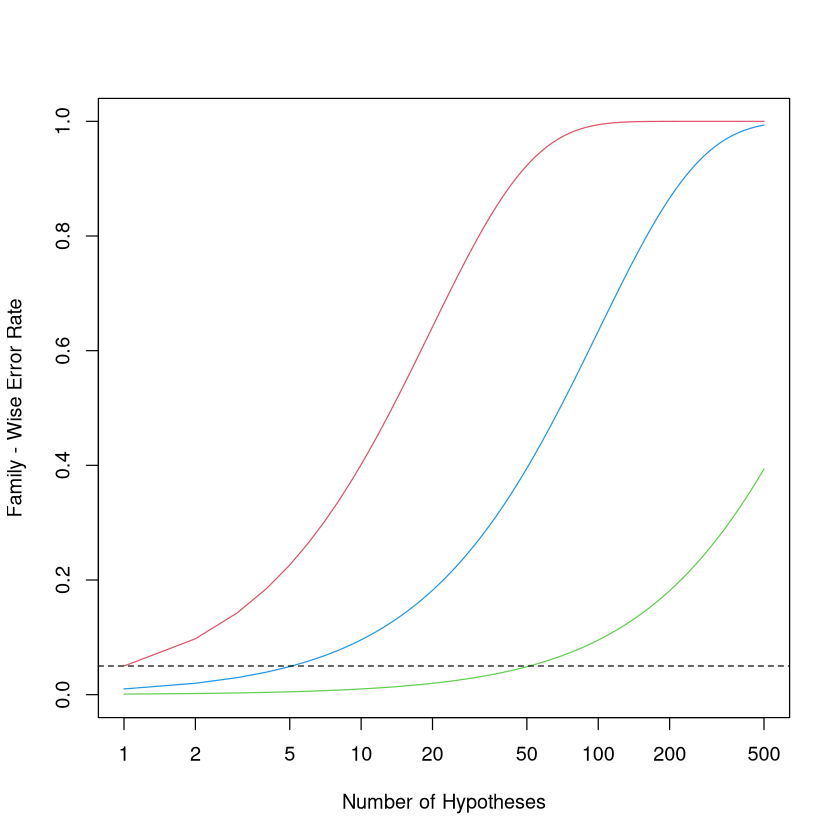

In [2]:
par(mfrow = c(1, 1))
plot(m, fwe1, type = "l", log = "x", ylim = c(0, 1), col = 2, ylab = "Family - Wise Error Rate", xlab = "Number of Hypotheses")
lines(m, fwe2, col = 4)
lines(m, fwe3, col = 3)
abline(h = 0.05, lty = 2)

As discussed previously, even for moderate values of $m$ such as 50, the FWER exceeds $0.05$ unless $\alpha$ is set to a very low value, such as $0.001$. Of course, the problem with setting $\alpha$ to such a low value is that we are likely to make a number of Type II errors: in other words, our power is very low.

We now conduct a one-sample t-test for each of the first five managers in the `Fund` dataset, in order to test the null hypothesis that the jth fund manager's mean return equals zero, $H_{oj} : \mu_j = 0$.

In [4]:
library(ISLR2)
fund.mini <- Fund[, 1:5]
t.test(fund.mini[,1], mu = 0)
fund.pvalue <- rep(0,5)
for(i in 1:5)
    fund.pvalue[i] <- t.test(fund.mini[, i], mu = 0)$p.value
fund.pvalue


	One Sample t-test

data:  fund.mini[, 1]
t = 2.8604, df = 49, p-value = 0.006202
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.8923397 5.1076603
sample estimates:
mean of x 
        3 


[1] 0.006202355 0.918271152 0.011600983 0.600539601 0.755781508

The p-values are low for Managers One and Three, and high for the other three managers. However, we cannot simply reject $H_{01}$ and $H_{03}$, since this would fail to account for the multiple testing that we have performed. Instead, we will conduct Bonferroni's method and Holm's method to control the FWER.

To do this, we use the `p.adjust()` function. Given the p-values, the function outputs _adjusted p-values_, which can be thought of as a new set of p-values that have been corrected for multiple testing. If the adjusted p-value for a given hypothesis is less than or equal to $\alpha$, then that hypothesis can be rejected while maintaining a FWER of no more than $\alpha$. In other words, the adjusted p-values resulting from the `p.adjust()` function can simply be compared to the desired FWER in order to determine whether or not to reject each hypothesis.

For example, in the case of Bonferroni's method, the raw p-values are multiplied by the total number of hypotheses, $m$, in order to obtain the adjusted p-values. (However, adjusted p-values are not allowed to exceed 1.)

In [5]:
p.adjust(fund.pvalue, method = "bonferroni")
pmin(fund.pvalue * 4, 1)

[1] 0.03101178 1.00000000 0.05800491 1.00000000 1.00000000

[1] 0.02480942 1.00000000 0.04640393 1.00000000 1.00000000

Therefore, using Bonferroni's method, we are able to reject the null hypothesis only for Manager One while controlling the FWER at $0.05$.

By contrast, using Holm's method, the adjusted p-values indicate that we can reject the null hypotheses for Managers One and Three at a FWER of $0.05$.

In [6]:
p.adjust(fund.pvalue, method = "holm")

[1] 0.03101178 1.00000000 0.04640393 1.00000000 1.00000000

As discussed previously, Manager One seems to perform particularly w ell, whereas Manager Two has poor performance.

In [7]:
apply(fund.mini, 2, mean)

Manager1 Manager2 Manager3 Manager4 Manager5 
     3.0     -0.1      2.8      0.5      0.3

Is there evidence of a meaningful difference in performance between these two managers? Performing a_paired t-test_ using the `t.test()` function results in a p-value of $0.038$, suggesting a statistically significant difference.

In [8]:
t.test(fund.mini[,1], fund.mini[,2], paired = T)


	Paired t-test

data:  fund.mini[, 1] and fund.mini[, 2]
t = 2.128, df = 49, p-value = 0.03839
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 0.1725378 6.0274622
sample estimates:
mean difference 
            3.1 


However, we decided to perform this test only after examining the data and noting that Managers One and Two had the highest and lowest mean performances. In a sense, this means that we have implicitly performed $\binom{5}{2} = 5(5 - 1)/2 = 10$ hypothesis tests, rather than just one, as discussed in Section 13.3.2. Hence, we use the `TukeyHSD()` function to apply Tukey'smethod in order to adjust for multiple testing. This function takes as input the output of an _ANOVA_ regression model, which is essentially just a linear regression in which all of the predictors are qualitative. In this case, the response consists of the monthly excess returns achieved by each manager, and the predictor indicates the manager to which each return corresponds.

In [9]:
returns <- as.vector(as.matrix(fund.mini))
manager <- rep(c("1", "2", "3", "4", "5"), rep(50, 5))
a1 <- aov(returns ~ manager)
TukeyHSD(x = a1)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = returns ~ manager)

$manager
    diff        lwr       upr     p adj
2-1 -3.1 -6.9865435 0.7865435 0.1861585
3-1 -0.2 -4.0865435 3.6865435 0.9999095
4-1 -2.5 -6.3865435 1.3865435 0.3948292
5-1 -2.7 -6.5865435 1.1865435 0.3151702
3-2  2.9 -0.9865435 6.7865435 0.2452611
4-2  0.6 -3.2865435 4.4865435 0.9932010
5-2  0.4 -3.4865435 4.2865435 0.9985924
4-3 -2.3 -6.1865435 1.5865435 0.4819994
5-3 -2.5 -6.3865435 1.3865435 0.3948292
5-4 -0.2 -4.0865435 3.6865435 0.9999095


The `TukeyHSD()` function provides confidence intervals for the difference between each pair of managers (`lwr` and `upr`), as well as a p-value. All of these quantities have been adjusted for multiple testing. Notice that the p-value for the difference between Managers One and Two has increased from $0.038$ to $0.186$, so there is no longer clear evidence of a difference between the managers' performances. We can plot the confidence intervals for the pairwise comparisons using the `plot()` function.

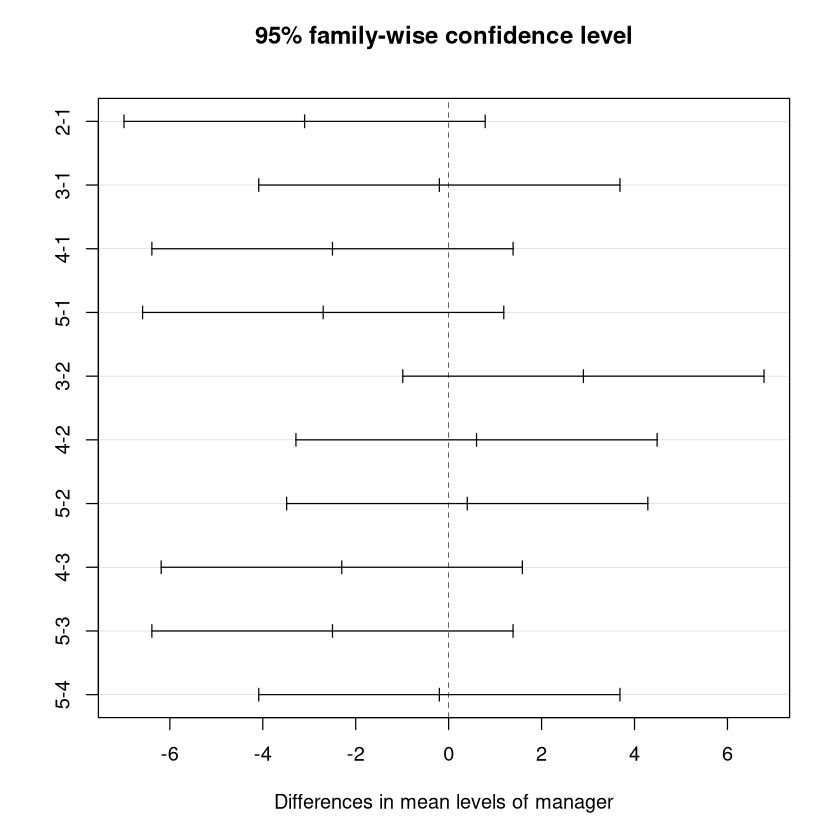

In [10]:
plot(TukeyHSD(x = a1))

The result can be seen in Figure 13.10.